In [1]:
#Casey Hoffman, Caroline Myers, Chanyoung Park 
#Spring 2020 Intro to Machine Learning Final Group Project
#Goal: We conduct PCA to perform dimension reduction on 26 items of the First Born Personality Scale (FBPS).
#Purpose: We seek to figure out whether there is a large difference between firstborn and children who were born later in terms of their scores on the Big Five Personality Test.

#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt #Plots
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Read data from file 'filename.csv' 
# (in the same directory that your python file is based)
# Control delimiters, rows, column names with read_csv (see later) 


from sklearn.decomposition import PCA 

import seaborn as sns #Statistical plots

In [3]:
# !! DATA FILE ("FBPS-ValidationData.csv") needs to belong in the same folder as the current file !!

df = pd.read_csv('FBPS-ValidationData.csv', delimiter = '\t')
data = df

In [4]:
print('Object type:', type(data)) #make sure this is a dataframe

print(data) # a preview of the data

Object type: <class 'pandas.core.frame.DataFrame'>
       Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  OPN8  OPN9  OPN10  \
0       4   4   4   5   5   4   3   4   4    5  ...     3     4      3   
1       5   5   5   4   2   5   5   5   5    5  ...     5     5      5   
2       2   1   2   4   4   1   4   4   4    5  ...     4     4      3   
3       2   1   3   2   4   3   3   3   3    5  ...     3     5      5   
4       2   1   4   5   2   5   4   4   2    5  ...     3     5      3   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...    ...   
41836   2   5   4   4   2   2   3   3   2    4  ...     3     5      4   
41837   2   2   1   1   4   2   2   3   4    4  ...     2     4      2   
41838   4   1   4   1   5   5   3   3   4    5  ...     3     5      5   
41839   5   5   4   4   2   2   2   4   4    5  ...     2     5      4   
41840   3   1   5   3   1   5   5   5   5    5  ...     5     5      5   

       country             dateload  source  screensize  int

In [5]:
#Let's see how many participants completed all items. If only a small subset failed to answer 
#all questions, we can safely remove those subjects row-wise and maintain the integrity of the dataset.  

#Only keeping the survey data with all the items answered
datacopy = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#great! only 4 subjects need to be dropped. 
print(datacopy)

       Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  OPN8  OPN9  OPN10  \
0       4   4   4   5   5   4   3   4   4    5  ...     3     4      3   
1       5   5   5   4   2   5   5   5   5    5  ...     5     5      5   
2       2   1   2   4   4   1   4   4   4    5  ...     4     4      3   
3       2   1   3   2   4   3   3   3   3    5  ...     3     5      5   
4       2   1   4   5   2   5   4   4   2    5  ...     3     5      3   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...    ...   
41836   2   5   4   4   2   2   3   3   2    4  ...     3     5      4   
41837   2   2   1   1   4   2   2   3   4    4  ...     2     4      2   
41838   4   1   4   1   5   5   3   3   4    5  ...     3     5      5   
41839   5   5   4   4   2   2   2   4   4    5  ...     2     5      4   
41840   3   1   5   3   1   5   5   5   5    5  ...     5     5      5   

       country             dateload  source  screensize  introelapse  \
0           DE  2019-04-12 10:52:18    

In [6]:
#extracting our target. What we're trying to predict. 
pruneddataTarget = datacopy.iloc[:,29]
print(pruneddataTarget)


#We are only interested in the 26 likert-scaled questions. 
pruneddataFeatures = datacopy.iloc[:,0:26]
print(pruneddataFeatures)

0        2
1        1
2        0
3        1
4        1
        ..
41836    1
41837    2
41838    2
41839    1
41840    2
Name: birthpos, Length: 41837, dtype: int64
       Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Q17  Q18  Q19  Q20  Q21  \
0       4   4   4   5   5   4   3   4   4    5  ...    1    5    1    2    1   
1       5   5   5   4   2   5   5   5   5    5  ...    3    3    2    3    1   
2       2   1   2   4   4   1   4   4   4    5  ...    1    1    2    4    5   
3       2   1   3   2   4   3   3   3   3    5  ...    1    1    3    2    3   
4       2   1   4   5   2   5   4   4   2    5  ...    1    5    5    5    4   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
41836   2   5   4   4   2   2   3   3   2    4  ...    2    3    4    3    2   
41837   2   2   1   1   4   2   2   3   4    4  ...    2    5    4    2    4   
41838   4   1   4   1   5   5   3   3   4    5  ...    1    4    1    3    1   
41839   5   5   4   4   2   2   2  

In [7]:
#standardize. This essentially projects our features to a unit scale with mean = 0 and var = 1.
pruneddataFeatures = StandardScaler().fit_transform(pruneddataFeatures)
print(pruneddataFeatures)

[[ 0.88289095  0.86469725  0.34431697 ... -1.40829197  0.4538574
  -0.98160372]
 [ 1.61142704  1.46163699  1.14603053 ...  0.80547655 -1.05877162
   0.30755232]
 [-0.57418124 -0.92612196 -1.25911015 ...  0.80547655 -1.05877162
  -0.3370257 ]
 ...
 [ 0.88289095 -0.92612196  0.34431697 ... -1.40829197  0.4538574
   0.95213034]
 [ 1.61142704  1.46163699  0.34431697 ...  0.06755371 -0.30245711
   0.95213034]
 [ 0.15435485 -0.92612196  1.14603053 ... -1.40829197  0.4538574
   1.59670836]]


In [8]:
#do not print out this! this will take FOREVER and make ur computer cry 
M = np.cov(pruneddataFeatures)

In [9]:
pca = PCA (n_components = None)

In [10]:
principalComponents = pca.fit_transform(pruneddataFeatures)
print(principalComponents[0:5,...]) #printing the first five rows to check the result


[[ 0.55192756 -0.75401082 -2.89964484 -0.57092745  0.84116153 -0.90385968
  -1.44999684  0.32514954 -0.93443978  0.63010705 -0.24456386 -0.93142976
  -0.84476691 -1.6760262  -0.15479766  1.47904747 -1.63636988 -0.17583262
   0.05471082  0.12907092 -0.63387806  1.139772   -0.31173226  0.22678288
  -0.55974023 -0.29207823]
 [-3.88257164  1.65753415 -1.22978553  0.85141074  0.80732423  0.47653285
   0.48299386  1.03044376  1.11430126  0.83487813  1.10815993 -0.0588691
  -0.3984933  -0.87225695 -0.19728348  0.77435447  0.50319169 -0.26565599
   0.21763178 -0.64830919 -0.11348461 -0.03557349 -0.03979996 -0.70960098
   0.2878123   0.31080156]
 [ 0.64360622  0.50076884 -0.85938159  0.62209434  1.06845194 -0.06470888
  -2.16149704  1.37702825 -1.02249591 -0.14198628  0.07445723 -0.2300989
   0.37421163  2.45464978  1.05877567 -0.92189701  1.06845457  0.02194905
   0.58140069  0.49052697 -1.62962319 -0.57379323  1.51042244  0.52153055
   0.88469199  0.27361291]
 [ 0.99981029 -1.01543686 -0.6310

In [11]:
principalDf = pd.DataFrame(data = principalComponents)

In [12]:
principalDf.head(5)
#These are the eigenvectors!

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.551928,-0.754011,-2.899645,-0.570927,0.841162,-0.903860,-1.449997,0.325150,-0.934440,0.630107,...,-1.636370,-0.175833,0.054711,0.129071,-0.633878,1.139772,-0.311732,0.226783,-0.559740,-0.292078
1,-3.882572,1.657534,-1.229786,0.851411,0.807324,0.476533,0.482994,1.030444,1.114301,0.834878,...,0.503192,-0.265656,0.217632,-0.648309,-0.113485,-0.035573,-0.039800,-0.709601,0.287812,0.310802
2,0.643606,0.500769,-0.859382,0.622094,1.068452,-0.064709,-2.161497,1.377028,-1.022496,-0.141986,...,1.068455,0.021949,0.581401,0.490527,-1.629623,-0.573793,1.510422,0.521531,0.884692,0.273613
3,0.999810,-1.015437,-0.631056,0.092173,-1.330426,0.024686,0.581327,0.910199,-1.038295,0.307383,...,0.666523,-1.029449,0.732316,0.566116,-0.208344,-0.164663,0.250221,-0.636283,-0.201191,0.087198
4,-0.209891,-0.865495,0.990787,0.654499,0.804399,1.945961,-0.111474,-0.849013,-1.615044,-1.409151,...,1.196580,1.813364,-1.291501,0.482201,-0.866178,0.273607,0.047146,-0.857485,-0.943640,-0.118795


Eigenvalues:
 [5.3464524  2.00520971 1.64876791 1.302467   1.18603135 1.08984106
 1.04884249 0.92139109 0.89061979 0.86218458 0.83065262 0.78524322
 0.78149146 0.72114335 0.69744424 0.66079774 0.6430936  0.63081246
 0.60567953 0.59753577 0.562701   0.53943532 0.49792982 0.46775656
 0.43636192 0.24073548]


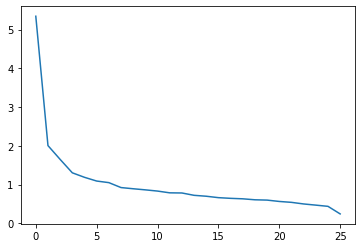

In [159]:
print('Eigenvalues:\n', pca.explained_variance_)
#This shows that there are only 7 factors that has eigenvalue larger than 1. 
#The first factor has an eigenvalue of 5.346, and the second has an eigenvalue of 2.005.
#The third to seventh factors have eigenvalues just slighly > 1. 
plt.plot(pca.explained_variance_)


[0.20562787 0.07712161 0.06341263 0.05009369 0.0456155  0.04191596
 0.04033913 0.03543727 0.03425379 0.03316015 0.03194741 0.03020094
 0.03005665 0.02773562 0.02682414 0.02541469 0.02473378 0.02426144
 0.02329481 0.0229816  0.02164183 0.02074702 0.01915069 0.01799021
 0.01678275 0.00925884]


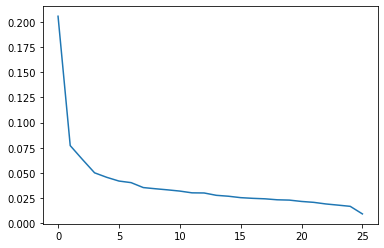

In [160]:
#This shows the ratio of variance explained by each factor. 
#The first factor explains 20.56% of the total variance. The second explains 7.71% of the total variance.
#Together, the first two factors explain approximately 28% of the total variance.
#For the purpose of the current assignment, we will use the first two principal components.
#The number of components also corresponds to the # of dimensions needed to plot the data. 
#If we were to retain >3 principal components, we wouldn't be able to plot our factors.

print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)


In [161]:
print(np.round(pca.components_,2)) #printing eigen vectors

[[-0.26 -0.14 -0.32 -0.22  0.08 -0.21 -0.31 -0.33 -0.29 -0.23 -0.24 -0.2
  -0.09 -0.18 -0.12 -0.25 -0.05  0.03 -0.13 -0.07  0.12  0.03 -0.24 -0.2
  -0.01 -0.15]
 [-0.06  0.16  0.02  0.11 -0.45 -0.14  0.06  0.08  0.01 -0.15  0.03 -0.19
  -0.11 -0.06 -0.2  -0.13 -0.03 -0.39 -0.1  -0.07 -0.38 -0.32  0.03  0.09
  -0.38 -0.15]
 [-0.24  0.06 -0.11  0.15  0.01 -0.37  0.06  0.02 -0.07 -0.23  0.02  0.01
   0.44 -0.11  0.19 -0.07  0.17  0.09  0.49 -0.1   0.07 -0.27  0.11  0.22
   0.07  0.14]
 [-0.16  0.05 -0.    0.16  0.04  0.03 -0.18 -0.16 -0.23 -0.13  0.05  0.29
  -0.26 -0.13  0.17  0.02  0.21 -0.05 -0.16  0.5  -0.11  0.14  0.02  0.35
  -0.19  0.31]
 [ 0.07  0.26  0.01  0.23  0.19  0.02  0.02  0.06  0.13 -0.02  0.04 -0.38
   0.09  0.06 -0.19 -0.29  0.46  0.03 -0.09  0.13  0.24  0.3   0.04  0.22
  -0.05 -0.33]
 [ 0.12 -0.27  0.04 -0.25  0.05  0.16  0.18  0.15  0.07 -0.05 -0.13 -0.05
   0.14 -0.41  0.41 -0.07  0.19 -0.22  0.01  0.37  0.04 -0.15  0.06 -0.21
  -0.09 -0.27]
 [ 0.23  0.1   0.04 -0.1

In [170]:
# Conducting a new PCA with a reduced number of factors (n=2)

pca = PCA(n_components=2)

pca.fit(pruneddataFeatures)

DataReduced = pca.transform(pruneddataFeatures)

print(DataReduced[0:5,...]) # printing first 5 rows to check the result. 

[[ 0.55192789 -0.75382305]
 [-3.8825715   1.65765932]
 [ 0.64360607  0.50078644]
 [ 0.99981016 -1.01557778]
 [-0.20989045 -0.86546243]]


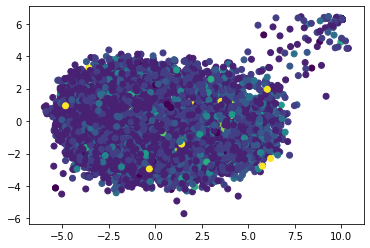

In [171]:
plt.scatter(DataReduced[...,0],DataReduced[...,1], c = pruneddataTarget)

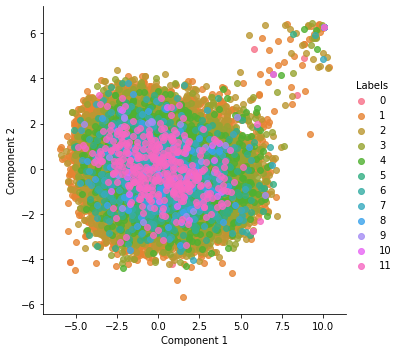

In [172]:
DataReducedFinal = pd.DataFrame({'Component 1': DataReduced[...,0], 'Component 2': DataReduced[...,1], 'Labels' : pruneddataTarget})
DataReducedFinal['Labels'] = DataReducedFinal.Labels.astype('category')

sns.lmplot(x = 'Component 1', y = 'Component 2', hue = 'Labels', data = DataReducedFinal, fit_reg = False)

In [ ]:
#Since the first two principal components could only explain for ~30% of the total variance, the classification is not very clear.
#The pattern of the data appears to be almost circular in nature, with no discernable trend (linear or ortherwise)
#We interpret the result of our PCA to be as follows: the very small proportion of variance accounted for suggests that the two principal components cannot significantly predict participant's birth order.
#We interpret this to suggest that birth order does not affect one's personality traits (or, that this effect may be very minimal.)
#These results are consistent with prior research that suggests no relationship between birth order + personality.
#We offer some similiar possible factors that may influence one's personality - ideas for future research directions.
#[possible other IVs here? wydt?]